#Ramesh Gopinath's Statistical NLP Project

#Part A - Digital Content Management

In [122]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Read and Understand Dataset

1A) Clearly write outcome of a Data analysis 

In [123]:
zip_path = "/content/drive/MyDrive/Colab Notebooks/Project/NLP/"

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

In [4]:
os.chdir(zip_path)

In [5]:
!ls

 blogs.zip      Milestone-NLP+1.pdf  'Ramesh Gopinath AIML - NLP Project.ipynb'
 blogtext.csv   NLP+FAQ+-+1.pdf
 GL+Bot.json    nonstop.csv


In [ ]:
from zipfile import ZipFile
with ZipFile(zip_path+'blogs.zip', 'r') as z:
  z.extractall(zip_path)

In [6]:
!ls

 blogs.zip      Milestone-NLP+1.pdf  'Ramesh Gopinath AIML - NLP Project.ipynb'
 blogtext.csv   NLP+FAQ+-+1.pdf
 GL+Bot.json    nonstop.csv


In [125]:
from nltk.tokenize import RegexpTokenizer
import re

In [126]:
blogs_df = pd.read_csv(zip_path+'blogtext.csv', nrows=4000) # We are taking less rows for faster execution
blogs_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [9]:
blogs_df.dtypes

id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object

In [10]:
blogs_df["gender"].value_counts()

male      3081
female     919
Name: gender, dtype: int64

In [11]:
blogs_df["age"].value_counts()

35    2307
24     347
15     319
17     191
25     157
14     129
23     106
33      94
27      86
39      79
36      60
26      43
16      26
37      19
45      14
41      14
34       6
44       3
Name: age, dtype: int64

In [12]:
blogs_df["topic"].value_counts()

Technology              2294
indUnk                   605
Student                  476
Engineering              119
Education                118
Sports-Recreation         75
InvestmentBanking         70
Communications-Media      61
Non-Profit                46
BusinessServices          43
Science                   33
Arts                      20
Internet                  20
Banking                   16
Museums-Libraries          2
Accounting                 2
Name: topic, dtype: int64

In [13]:
blogs_df.shape

(4000, 7)

In [14]:
blogs_df.describe()

,id,age
count,4.000000e+03,4000.000000
mean,1.523299e+06,29.929000
std,1.304308e+06,7.726991
min,5.897360e+05,14.000000
25%,5.897360e+05,24.000000
50%,5.897360e+05,35.000000
75%,3.176655e+06,35.000000
max,4.313749e+06,45.000000


In [15]:
blogs_df.describe(include=object)

,gender,topic,sign,date,text
count,4000,4000,4000,4000,4000
unique,2,16,12,295,3989
top,male,Technology,Aries,"05,August,2004",
freq,3081,2294,2449,2306,6


In [276]:
#Function to accept dataframe and then print pie charts for all Categorical columns

def pie_df(df):
  for col2 in df.select_dtypes(include=['object']).columns:
    if (col2 == 'gender') or (col2 == 'age') or (col2 == 'topic') or (col2 == 'sign'):
      df.groupby(col2).size().plot(kind='pie', subplots=True, shadow=True, startangle=30, figsize=(12,9), autopct='%1.2f%%')                
      font1 = {'family':'serif','color':'blue','size':20}
      plt.title(col2, fontdict = font1)    
      plt.tight_layout()
      plt.show()

In [277]:
def hist_df(df):

    for col1 in df.select_dtypes(include=['object']).columns:
      if (col1 == 'gender') or (col1 == 'age') or (col1 == 'topic') or (col1 == 'sign'):
        fig = plt.figure(figsize = (15,9))
        plt.rcParams.update({'figure.max_open_warning': 0})
        ax = fig.gca()
        fig.suptitle(col1, fontsize=20)
        sns.histplot(df[col1], kde=True, ax=ax)

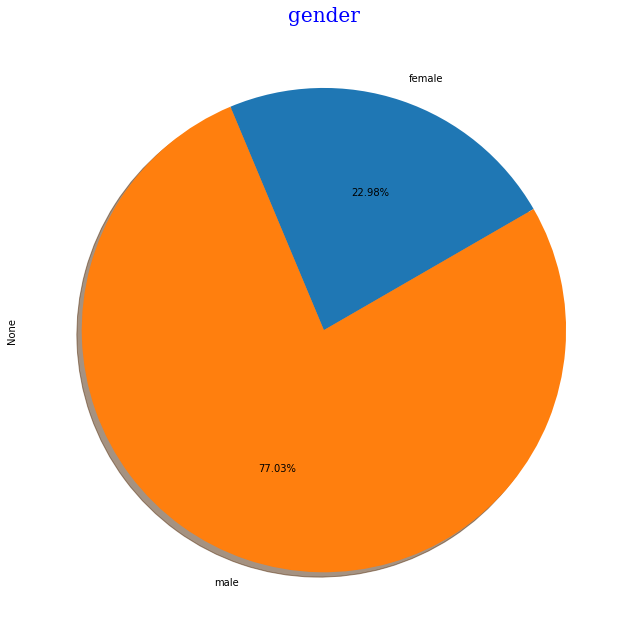

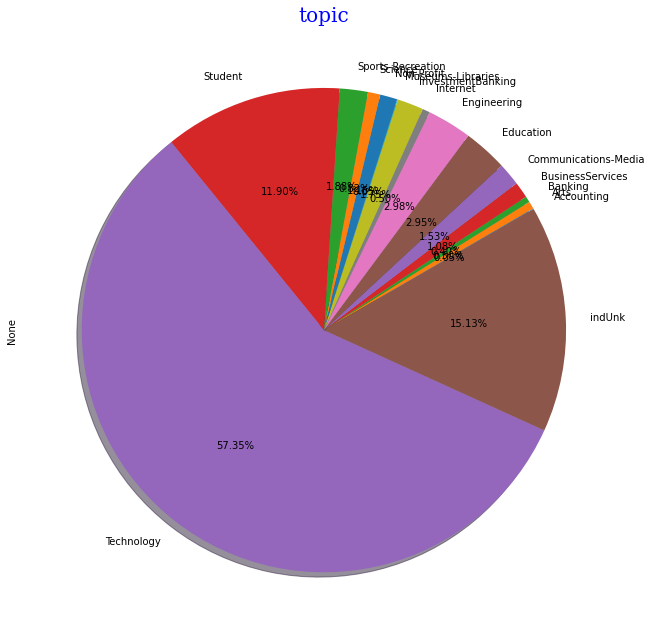

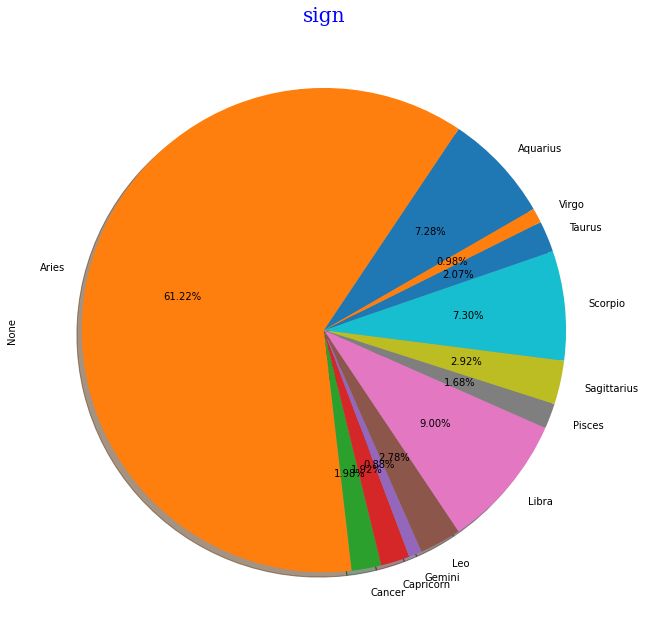

In [278]:
pie_df(blogs_df)

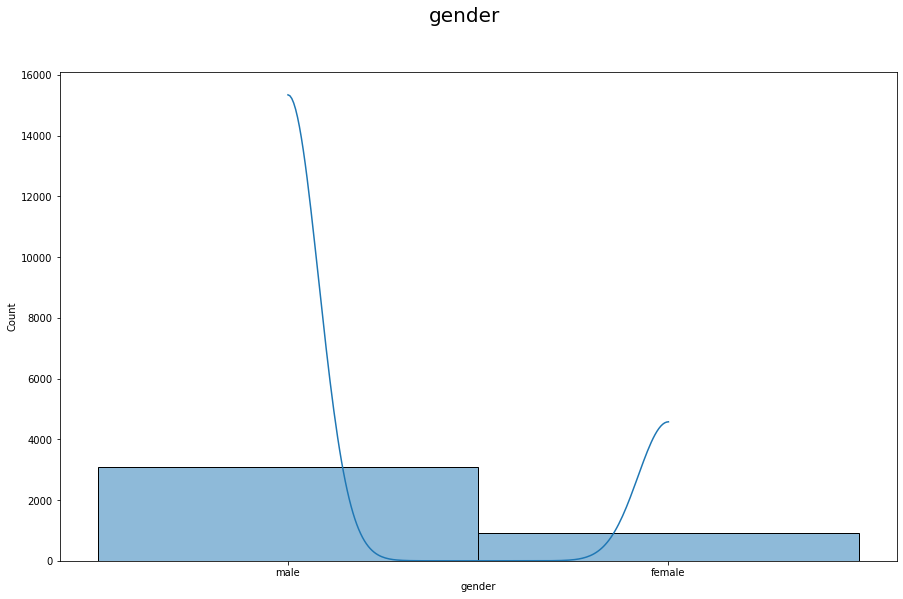

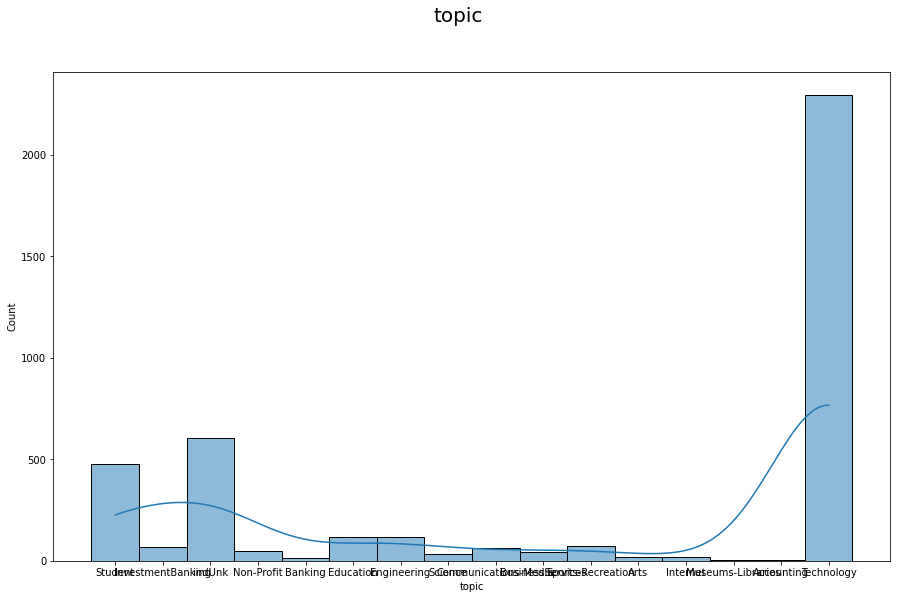

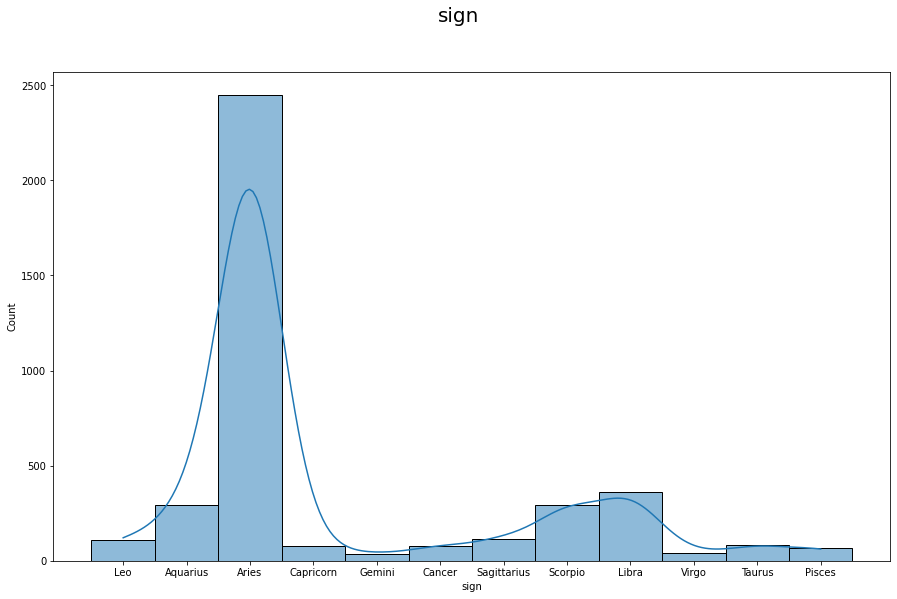

In [279]:
hist_df(blogs_df)

1B). Clean the Structured Data

i) Missing value analysis and imputation

In [280]:
for i in blogs_df.columns:
    percent_missing = blogs_df[i].isnull().sum() * 100 / len(blogs_df[i])
    print("column is ",i)
    print(percent_missing)


column is  id
0.0
column is  gender
0.0
column is  age
0.0
column is  topic
0.0
column is  sign
0.0
column is  date
0.0
column is  text
0.0
column is  language
0.175


In [281]:
# Check for missing values present
print('Number of missing values across columns-\n', blogs_df.isnull().sum())

Number of missing values across columns-
 id          0
gender      0
age         0
topic       0
sign        0
date        0
text        0
language    7
dtype: int64


ii) Eliminate non-english textual data

In [127]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
from langdetect import detect

def detect_english(text):
  try:
    return detect(text)
  except:
    return np.nan

In [129]:
blogs_df['language'] = blogs_df.text.apply(detect_english)

blogs_non_eng = blogs_df[blogs_df.language.isna()]

blogs_eng_df = blogs_df[blogs_df.language.eq('en')]

In [25]:
blogs_non_eng.shape

(7, 8)

In [26]:
blogs_non_eng

,id,gender,age,topic,sign,date,text,language
716,3667495,male,15,Science,Libra,"28,June,2004",,NaN
3277,589736,male,35,Technology,Aries,"05,August,2004",,NaN
3469,589736,male,35,Technology,Aries,"05,August,2004",,NaN
3578,589736,male,35,Technology,Aries,"05,August,2004",,NaN
3626,589736,male,35,Technology,Aries,"05,August,2004",,NaN
3627,589736,male,35,Technology,Aries,"05,August,2004",,NaN
3637,589736,male,35,Technology,Aries,"05,August,2004",,NaN


In [27]:
blogs_eng_df.shape

(3748, 8)

In [28]:
blogs_eng_df.dtypes

id           int64
gender      object
age          int64
topic       object
sign        object
date        object
text        object
language    object
dtype: object

In [29]:
blogs_df["language"].value_counts()

en    3748
nl      25
af      25
no      21
de      17
so      17
cy      15
es      12
tl      11
fr       9
da       9
lt       9
it       7
sv       7
vi       6
pl       6
ca       6
ro       6
id       6
sl       6
fi       5
et       4
tr       4
hr       3
sq       2
hu       2
sw       1
uk       1
sk       1
cs       1
pt       1
Name: language, dtype: int64

In [130]:
blogs_eng_df.head(10)

,id,gender,age,topic,sign,date,text,language
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",en
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,en
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,en
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,en
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...,en
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...,en
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o...",en
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...,en
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...,en
10,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004","Ah, the Korean language...it look...",en


In [31]:
blogs_eng_df.describe(include=object)

,gender,topic,sign,date,text,language
count,3748,3748,3748,3748,3748,3748
unique,2,16,12,293,3744,1
top,male,Technology,Aries,"05,August,2004",Around 1:00 my mom picked me ...,en
freq,2858,2100,2254,2112,3,3748


##2. Preprocess unstructured data to make it consumable for model training

2A. Eliminate All special Characters and Numbers 

In [131]:
import re

In [132]:
def remove_specialchars(txt):
  return re.sub('[^a-zA-Z]',' ', txt)


In [133]:
blogs_eng_df['normal_text'] = blogs_eng_df['text'].apply(remove_specialchars)
blogs_eng_df.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,gender,age,topic,sign,date,text,language,normal_text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",en,Info has been found pages ...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,en,In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,en,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,en,Thanks to Yahoo s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...,en,I had an interesting conversation...


2B). Lowercase all textual data 

In [134]:
def lower_case(text):
  return text.lower()

In [135]:
blogs_eng_df['lower_text'] = blogs_eng_df['normal_text'].apply(lower_case)
blogs_eng_df.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,gender,age,topic,sign,date,text,language,normal_text,lower_text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",en,Info has been found pages ...,info has been found pages ...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,en,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,en,testing testing,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,en,Thanks to Yahoo s Toolbar I can ...,thanks to yahoo s toolbar i can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...,en,I had an interesting conversation...,i had an interesting conversation...


2C). Remove all Stopwords 

In [136]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords',quiet=True) # stopword library
stops = set(stopwords.words('english'))

In [137]:
print(stops)

{'until', 'such', 'your', 'can', "shouldn't", 'was', 'just', 'or', 'couldn', 'and', 'after', 'with', 'all', 'now', 'haven', 'these', 'mightn', 'before', 'him', 'ours', 'did', 'itself', 'it', 'a', 'don', 'not', 'its', 'they', 'down', 'other', 'further', "hadn't", 'wasn', 'are', 'those', 'to', 'wouldn', 'be', 'so', 'had', 've', 'out', 's', "should've", 'over', "you'd", "it's", 'doing', 'y', 'own', 'theirs', 'both', 'd', 'am', 'on', 'hers', 'them', 'our', 'by', "weren't", 'she', 'themselves', 'from', 'i', 'while', "she's", 'up', 'each', "hasn't", 'shan', 'yourself', 'the', 'into', 'ain', 'aren', "didn't", "aren't", "won't", 'ma', 'of', 'won', "isn't", 'his', 'an', 'in', 'as', 'hasn', "couldn't", 't', "mightn't", 'mustn', 'needn', 'being', 're', 'at', 'through', 'does', 'against', 'her', 'weren', 'too', 'have', 'if', 'this', "haven't", 'off', 'above', 'we', 'there', 'than', "don't", 'for', 'me', 'whom', 'only', 'were', 'you', 'their', 'herself', "you've", 'but', 'most', 'few', 'will', "mus

In [138]:
len(stops)

179

In [139]:
blogs_eng_df['non_stop_words'] = blogs_eng_df['lower_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stops)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
blogs_eng_df["non_stop_words"]

0       info found pages mb pdf files wait untill team...
2       het kader van kernfusie op aarde maak je eigen...
3                                         testing testing
4       thanks yahoo toolbar capture urls popups means...
5       interesting conversation dad morning talking k...
                              ...                        
3995    time said earlier company work urllink kmg mov...
3996    know know promised update frequently ever sinc...
3997    yep long hiatus back sorry updating much real ...
3998    stealthy assignment hours since briefing previ...
3999    really late tell way typing bit tired staying ...
Name: non_stop_words, Length: 3748, dtype: object

In [42]:
blogs_eng_df.dtypes

id                 int64
gender            object
age                int64
topic             object
sign              object
date              object
text              object
language          object
normal_text       object
lower_text        object
non_stop_words    object
dtype: object

2D). Remove all extra white spaces 

In [141]:
blogs_eng_df["non_stop_no_space"] = blogs_eng_df["non_stop_words"].str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
blogs_eng_df[["non_stop_words","non_stop_no_space"]]

,non_stop_words,non_stop_no_space
0,info found pages mb pdf files wait untill team...,info found pages mb pdf files wait untill team...
2,het kader van kernfusie op aarde maak je eigen...,het kader van kernfusie op aarde maak je eigen...
3,testing testing,testing testing
4,thanks yahoo toolbar capture urls popups means...,thanks yahoo toolbar capture urls popups means...
5,interesting conversation dad morning talking k...,interesting conversation dad morning talking k...
...,...,...
3995,time said earlier company work urllink kmg mov...,time said earlier company work urllink kmg mov...
3996,know know promised update frequently ever sinc...,know know promised update frequently ever sinc...
3997,yep long hiatus back sorry updating much real ...,yep long hiatus back sorry updating much real ...
3998,stealthy assignment hours since briefing previ...,stealthy assignment hours since briefing previ...


In [143]:
blogs_eng_df["non_stop_no_space_1"] = blogs_eng_df["non_stop_no_space"].str.lstrip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
blogs_eng_df[["non_stop_words","non_stop_no_space", "non_stop_no_space_1"]].to_csv(zip_path+'nonstop.csv', index=False)

In [145]:
blogs_eng_df[["non_stop_words","non_stop_no_space", "non_stop_no_space_1"]]

,non_stop_words,non_stop_no_space,non_stop_no_space_1
0,info found pages mb pdf files wait untill team...,info found pages mb pdf files wait untill team...,info found pages mb pdf files wait untill team...
2,het kader van kernfusie op aarde maak je eigen...,het kader van kernfusie op aarde maak je eigen...,het kader van kernfusie op aarde maak je eigen...
3,testing testing,testing testing,testing testing
4,thanks yahoo toolbar capture urls popups means...,thanks yahoo toolbar capture urls popups means...,thanks yahoo toolbar capture urls popups means...
5,interesting conversation dad morning talking k...,interesting conversation dad morning talking k...,interesting conversation dad morning talking k...
...,...,...,...
3995,time said earlier company work urllink kmg mov...,time said earlier company work urllink kmg mov...,time said earlier company work urllink kmg mov...
3996,know know promised update frequently ever sinc...,know know promised update frequently ever sinc...,know know promised update frequently ever sinc...
3997,yep long hiatus back sorry updating much real ...,yep long hiatus back sorry updating much real ...,yep long hiatus back sorry updating much real ...
3998,stealthy assignment hours since briefing previ...,stealthy assignment hours since briefing previ...,stealthy assignment hours since briefing previ...


In [48]:
blogs_eng_df.dtypes

id                      int64
gender                 object
age                     int64
topic                  object
sign                   object
date                   object
text                   object
language               object
normal_text            object
lower_text             object
non_stop_words         object
non_stop_no_space      object
non_stop_no_space_1    object
dtype: object

In [146]:
blogs_final = blogs_eng_df[["id", "gender", "age", "topic", "sign", "date", "non_stop_no_space"]]

In [50]:
blogs_final.dtypes

id                    int64
gender               object
age                   int64
topic                object
sign                 object
date                 object
non_stop_no_space    object
dtype: object

In [147]:
blogs_final.rename({'non_stop_no_space': 'final_txt'}, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [148]:
blogs_final

,id,gender,age,topic,sign,date,final_txt
0,2059027,male,15,Student,Leo,"14,May,2004",info found pages mb pdf files wait untill team...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoo toolbar capture urls popups means...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",interesting conversation dad morning talking k...
...,...,...,...,...,...,...,...
3995,3316021,male,25,Arts,Aries,"11,May,2004",time said earlier company work urllink kmg mov...
3996,3316021,male,25,Arts,Aries,"11,May,2004",know know promised update frequently ever sinc...
3997,3316021,male,25,Arts,Aries,"11,May,2004",yep long hiatus back sorry updating much real ...
3998,3536864,male,14,Student,Leo,"25,June,2004",stealthy assignment hours since briefing previ...


##3. Build a base Classification model 

3A). Create dependent and independent variables 

In [149]:
#   Segregating Predictors and Target attributes (Problem statment mentioned about considering Text as Independent and topic as dependent variable)

X = blogs_final["final_txt"]   #........... Independent variables / Predictors attribute, 
y = blogs_final['topic']       #............Dependent variable / Target attribute

In [150]:
X

0       info found pages mb pdf files wait untill team...
2       het kader van kernfusie op aarde maak je eigen...
3                                         testing testing
4       thanks yahoo toolbar capture urls popups means...
5       interesting conversation dad morning talking k...
                              ...                        
3995    time said earlier company work urllink kmg mov...
3996    know know promised update frequently ever sinc...
3997    yep long hiatus back sorry updating much real ...
3998    stealthy assignment hours since briefing previ...
3999    really late tell way typing bit tired staying ...
Name: final_txt, Length: 3748, dtype: object

In [151]:
y

0                 Student
2                 Student
3                 Student
4       InvestmentBanking
5       InvestmentBanking
              ...        
3995                 Arts
3996                 Arts
3997                 Arts
3998              Student
3999              Student
Name: topic, Length: 3748, dtype: object

In [152]:
y.value_counts()

Technology              2098
indUnk                   587
Student                  456
Engineering              119
Education                116
Sports-Recreation         75
InvestmentBanking         70
Communications-Media      61
Non-Profit                44
Science                   31
BusinessServices          31
Arts                      20
Internet                  20
Banking                   16
Museums-Libraries          2
Accounting                 2
Name: topic, dtype: int64

In [153]:
y_orig = y.copy()

In [154]:
y_orig.value_counts()

Technology              2098
indUnk                   587
Student                  456
Engineering              119
Education                116
Sports-Recreation         75
InvestmentBanking         70
Communications-Media      61
Non-Profit                44
Science                   31
BusinessServices          31
Arts                      20
Internet                  20
Banking                   16
Museums-Libraries          2
Accounting                 2
Name: topic, dtype: int64

In [155]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
y = labelencoder.fit_transform(y)


In [156]:
unique, counts = np.unique(y, return_counts=True)
print(unique)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[   2   20   16   31   61  116  119   20   70    2   44   31   75  456
 2098  587]


There are 16 classes in target attribute (Dependent variable)

In [157]:
print("X shape",X.shape)
print("y shape",y.shape)

X shape (3748,)
y shape (3748,)


3B). Split data into train and test

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 80% training and 20% testing
print('X train: {}'.format(X_train.shape))
print('y train: {}'.format(y_train.shape))
print('X test: {}'.format(X_test.shape))
print('y test: {}'.format(y_test.shape))

X train: (2998,)
y train: (2998,)
X test: (750,)
y test: (750,)


3C). Vectorize data using any one vectorizer - CountVectorizer

In [198]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_2 = CountVectorizer()

X_train_2 = vectorizer_2.fit_transform(X_train)
X_test_2 = vectorizer_2.transform(X_test)

print(vectorizer_2.get_feature_names_out())

print(X_train_2.toarray())

['aa' 'aaa' 'aaaaaaah' ... 'zzz' 'zzzexy' 'zzzzz']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [282]:
# Create Data Frame of countvectorizer scores
cvec_X_train_1 = pd.DataFrame(X_train_2.toarray(),
             columns = vectorizer_2.get_feature_names_out(),
             index = X_train.index)



In [200]:
cvec_X_train_1

,aa,aaa,aaaaaaah,aaaaaah,aaaah,aaagh,aaah,aaarrrggghhhhhhhhgggghhhhhh,aal,aamco,...,zookx,zookz,zoom,zorra,zorro,zun,zuo,zzz,zzzexy,zzzzz
493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
print("X_train_2.shape",X_train_2.shape)
print("X_test_2 shape",X_test_2.shape)

X_train_2.shape (2998, 26130)
X_test_2 shape (750, 26130)


3D). Build a base model for Supervised Learning - Classification

In [202]:
from sklearn.svm import SVC  

clf_svc_cvec = SVC(kernel='linear',probability=True)
  
clf_svc_cvec.fit(X_train_2, y_train)
pred_svc_cvec = clf_svc_cvec.predict(X_test_2)
print(accuracy_score(y_test, pred_svc_cvec))

0.7413333333333333


In [203]:
pred_proba_cvec = clf_svc_cvec.predict_proba(X_test_2)

In [204]:
print(y_test[0])
print(pred_proba_cvec[0])
print(max(pred_proba_cvec[0]))
print(np.argmax(pred_proba_cvec[0]))

14
[4.27432057e-04 1.67657609e-03 1.27179490e-03 1.01796684e-02
 5.59492164e-03 9.86637468e-03 1.22878414e-02 2.16186201e-03
 1.71230539e-03 5.81965247e-04 1.27646690e-02 9.13773078e-03
 1.67014966e-03 7.68863970e-02 8.23175216e-01 3.06050957e-02]
0.823175216069986
14


In [205]:
pred_proba_cvec[:,1]
roc_auc_score(y_test, pred_proba_cvec, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15])

0.8192165318331418

In [206]:
print("y_test[0]",y_test[0])
print("pred_svc_cvec[0]",pred_svc_cvec[0])
print("")
print("labelencoder.inverse_transform y_test[0]",labelencoder.inverse_transform(y_test)[0])
print("")
print("labelencoder.inverse_transform pred_svc_cvec[0]",labelencoder.inverse_transform(pred_svc_cvec)[0])

y_test[0] 14
pred_svc_cvec[0] 14

labelencoder.inverse_transform y_test[0] Technology

labelencoder.inverse_transform pred_svc_cvec[0] Technology


In [208]:
#Predicting first 15 y_test topics using SVC with CountVectorizer
First_15_predictions = pred_svc_cvec[:15]
First_15_actuals = y_test[:15]

First_15_decoded_actuals = labelencoder.inverse_transform(First_15_actuals)
print("First_15_decoded_actuals",First_15_decoded_actuals)
print("")
First_15_decoded_predictions = labelencoder.inverse_transform(First_15_predictions)
print("First_15_decoded_predictions",First_15_decoded_predictions) 

First_15_decoded_actuals ['Technology' 'Technology' 'indUnk' 'Technology' 'Technology' 'Technology'
 'indUnk' 'indUnk' 'Technology' 'Student' 'indUnk' 'indUnk' 'Technology'
 'Sports-Recreation' 'indUnk']

First_15_decoded_predictions ['Technology' 'Technology' 'indUnk' 'Technology' 'Technology' 'Technology'
 'Student' 'indUnk' 'Technology' 'Student' 'Technology' 'Student'
 'Technology' 'Sports-Recreation' 'indUnk']


3E). Clearly print Performance Metrics

In [73]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [209]:
print("SVC with Countvectorizer - Accuracy ",metrics.accuracy_score(y_test, pred_svc_cvec))
print("SVC with Countvectorizer - Precision",metrics.precision_score(y_test, pred_svc_cvec, average='weighted'))
print("SVC with Countvectorizer - Recall   ",metrics.recall_score(y_test, pred_svc_cvec, average='weighted'))
print("SVC with Countvectorizer - F1 score ",metrics.f1_score(y_test, pred_svc_cvec, average='weighted'))
print("SVC with Countvectorizer - roc_auc  ",metrics.roc_auc_score(y_test, pred_proba_cvec, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))

SVC with Countvectorizer - Accuracy  0.7413333333333333
SVC with Countvectorizer - Precision 0.72366995537056
SVC with Countvectorizer - Recall    0.7413333333333333
SVC with Countvectorizer - F1 score  0.7223126787257774
SVC with Countvectorizer - roc_auc   0.8192165318331418


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##4. Improve Performance of model

4A). Experiment with other vectorisers

Using TfidVectorizer

In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer  #   using TFid Vectorizer

In [211]:
vectorizer = TfidfVectorizer()

X_train_1 = vectorizer.fit_transform(X_train)
X_test_1 = vectorizer.transform(X_test)

In [212]:
# Create Data Frame of tdidf scores
tfidf_X_train_1 = pd.DataFrame(X_train_1.toarray(),
             columns = vectorizer.get_feature_names_out(),
             index = X_train.index)

In [213]:
tfidf_X_train_1

,aa,aaa,aaaaaaah,aaaaaah,aaaah,aaagh,aaah,aaarrrggghhhhhhhhgggghhhhhh,aal,aamco,...,zookx,zookz,zoom,zorra,zorro,zun,zuo,zzz,zzzexy,zzzzz
493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
print("X_train_1.shape",X_train_1.shape)
print("X_test_1 shape",X_test_1.shape)

X_train_1.shape (2998, 26130)
X_test_1 shape (750, 26130)


In [215]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score

clf_svc_tfid = SVC(kernel='linear',probability=True)
  
clf_svc_tfid.fit(X_train_1, y_train)
pred_svc_tfid = clf_svc_tfid.predict(X_test_1)
print(accuracy_score(y_test, pred_svc_tfid))

0.7773333333333333


In [216]:
pred_proba_tfid = clf_svc_tfid.predict_proba(X_test_1)

In [217]:
print(y_test[0])
print(pred_proba_tfid[0])
print(max(pred_proba_tfid[0]))
print(np.argmax(pred_proba_tfid[0]))

14
[2.02694565e-04 8.26838036e-04 6.17566236e-04 1.62912929e-02
 4.78850805e-03 6.23810835e-03 2.63472762e-03 1.11846638e-03
 8.20099205e-04 2.44876615e-04 5.16338236e-03 3.58676954e-03
 8.33104450e-04 4.57201725e-02 8.59406343e-01 5.15070500e-02]
0.8594063431748606
14


In [218]:
pred_proba_tfid[:,1]
roc_auc_score(y_test, pred_proba_tfid, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15])

0.8908984801704399

In [219]:
print("y_test[0]",y_test[0])
print("pred[0]",pred_svc_tfid[0])
print("")
print("labelencoder.inverse_transform y_test[0]",labelencoder.inverse_transform(y_test)[0])
print("")
print("labelencoder.inverse_transform pred[0]",labelencoder.inverse_transform(pred_svc_tfid)[0])


y_test[0] 14
pred[0] 14

labelencoder.inverse_transform y_test[0] Technology

labelencoder.inverse_transform pred[0] Technology


In [220]:
#Predicting first 15 y_test topics using SVC with TFidVectorizer of Words as Vectorizer

First_15_predictions = pred_svc_tfid[:15]
First_15_actuals = y_test[:15]

First_15_decoded_actuals = labelencoder.inverse_transform(First_15_actuals)
print("First_15_decoded_actuals",First_15_decoded_actuals)
print("")
First_15_decoded_predictions = labelencoder.inverse_transform(First_15_predictions)
print("First_15_decoded_predictions",First_15_decoded_predictions) 

First_15_decoded_actuals ['Technology' 'Technology' 'indUnk' 'Technology' 'Technology' 'Technology'
 'indUnk' 'indUnk' 'Technology' 'Student' 'indUnk' 'indUnk' 'Technology'
 'Sports-Recreation' 'indUnk']

First_15_decoded_predictions ['Technology' 'Technology' 'indUnk' 'Technology' 'Technology' 'Technology'
 'Student' 'indUnk' 'Technology' 'Technology' 'Technology' 'Technology'
 'Technology' 'Sports-Recreation' 'indUnk']


In [221]:
print("SVC with TfidVectorizer - Accuracy ",metrics.accuracy_score(y_test, pred_svc_tfid))
print("SVC with TfidVectorizer - Precision",metrics.precision_score(y_test, pred_svc_tfid, average='weighted'))
print("SVC with TfidVectorizer - Recall   ",metrics.recall_score(y_test, pred_svc_tfid, average='weighted'))
print("SVC with TfidVectorizer - F1 score ",metrics.f1_score(y_test, pred_svc_tfid, average='weighted'))
print("SVC with TFidVectorizer - roc_auc  ",metrics.roc_auc_score(y_test, pred_proba_tfid, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))


SVC with TfidVectorizer - Accuracy  0.7773333333333333
SVC with TfidVectorizer - Precision 0.7705668915974091
SVC with TfidVectorizer - Recall    0.7773333333333333
SVC with TfidVectorizer - F1 score  0.7435578764811709
SVC with TFidVectorizer - roc_auc   0.8908984801704399


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4B). Build classifier Models using other algorithms than base model

In [222]:
# .... Train Logistic Regression model with TFidVectorizer

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Fit the model on train
model_lr_tfid = LogisticRegression(solver="liblinear")

model_lr_tfid.fit(X_train_1.toarray(), y_train)
#predict on test
y_pred_logit_tfid = model_lr_tfid.predict(X_test_1.toarray())

In [223]:
y_pred_proba_logit_tfid = model_lr_tfid.predict_proba(X_test_1.toarray())

In [224]:
y_pred_proba_logit_tfid

array([[0.00231354, 0.00664531, 0.00491598, ..., 0.07103698, 0.67851854,
        0.10186307],
       [0.00222252, 0.00580242, 0.00467828, ..., 0.05113836, 0.73340232,
        0.08878988],
       [0.00253578, 0.00871507, 0.00631079, ..., 0.16257409, 0.23214252,
        0.38021302],
       ...,
       [0.002219  , 0.00644745, 0.00536495, ..., 0.06482206, 0.71555805,
        0.08457039],
       [0.00225786, 0.00625936, 0.0046126 , ..., 0.0493903 , 0.74725121,
        0.08319942],
       [0.00224843, 0.00666176, 0.00510611, ..., 0.0550197 , 0.65480493,
        0.1473854 ]])

In [225]:
print(y_test[0])
print(y_pred_proba_logit_tfid[0])
print(max(y_pred_proba_logit_tfid[0]))
print(np.argmax(y_pred_proba_logit_tfid[0]))

14
[0.00231354 0.00664531 0.00491598 0.01252245 0.01604974 0.02488655
 0.02287676 0.00624695 0.01345831 0.00253461 0.011877   0.00982565
 0.01442856 0.07103698 0.67851854 0.10186307]
0.6785185449148972
14


In [226]:
y_pred_proba_logit_tfid[:,1]
roc_auc_score(y_test, y_pred_proba_logit_tfid, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15])

0.8477858186420091

In [227]:
model_score_train_tfid = model_lr_tfid.score(X_train_1, y_train)
print(model_score_train_tfid)

0.7521681120747165


In [228]:
model_score_test_tfid = model_lr_tfid.score(X_test_1, y_test)
print(model_score_test_tfid)

0.684


In [230]:
print("y_test[0]",y_test[0])
print("pred_logit_tfid[0]",y_pred_logit_tfid[0])
print("")
print("labelencoder.inverse_transform y_test[0]",labelencoder.inverse_transform(y_test)[0])
print("")
print("labelencoder.inverse_transform pred_logit_tfid[0]",labelencoder.inverse_transform(y_pred_logit_tfid)[0])


y_test[0] 14
pred_logit_tfid[0] 14

labelencoder.inverse_transform y_test[0] Technology

labelencoder.inverse_transform pred_logit_tfid[0] Technology


In [231]:
#Predicting first 15 y_test topics using Logistic Regression with TFidVectorizer

First_15_predictions = y_pred_logit_tfid[:15]
First_15_actuals = y_test[:15]

First_15_decoded_actuals = labelencoder.inverse_transform(First_15_actuals)
print("First_15_decoded_actuals",First_15_decoded_actuals)
print("")
First_15_decoded_predictions = labelencoder.inverse_transform(First_15_predictions)
print("First_15_decoded_predictions",First_15_decoded_predictions) 

First_15_decoded_actuals ['Technology' 'Technology' 'indUnk' 'Technology' 'Technology' 'Technology'
 'indUnk' 'indUnk' 'Technology' 'Student' 'indUnk' 'indUnk' 'Technology'
 'Sports-Recreation' 'indUnk']

First_15_decoded_predictions ['Technology' 'Technology' 'indUnk' 'Technology' 'Technology' 'Technology'
 'Technology' 'indUnk' 'Technology' 'Technology' 'Technology' 'Technology'
 'Technology' 'indUnk' 'Technology']


Using Logistic regression model with CountVectorizer

In [240]:
# .... Train Logistic Regression model with CountVectorizer

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Fit the model on train
model_lr_cvec = LogisticRegression(solver="liblinear")

model_lr_cvec.fit(X_train_2, y_train)
#predict on test
y_pred_logit_cvec = model_lr_cvec.predict(X_test_2)

In [241]:
model_score_train_cvec = model_lr_cvec.score(X_train_2, y_train)
print(model_score_train_cvec)
print("")
model_score_test_cvec = model_lr_cvec.score(X_test_2, y_test)
print(model_score_test_cvec)

0.9889926617745164

0.7706666666666667


In [242]:
y_pred_proba_logit_cvec = model_lr_cvec.predict_proba(X_test_2)

In [243]:
print(y_test[0])
print(y_pred_proba_logit_cvec[0])
print(max(y_pred_proba_logit_cvec[0]))
print(np.argmax(y_pred_proba_logit_cvec[0]))

14
[7.07528896e-04 6.87362336e-04 5.28495815e-04 1.20848350e-02
 4.14696582e-04 1.70373567e-03 2.10190082e-03 1.91368775e-03
 1.58554252e-03 3.72516339e-04 5.33834120e-03 1.60781810e-03
 1.23722646e-03 5.80353945e-03 9.61582940e-01 2.32983275e-03]
0.9615829402737578
14


In [244]:
y_pred_proba_logit_cvec[:,1]
roc_auc_score(y_test, y_pred_proba_logit_cvec, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15])

0.8405258402448444

In [246]:
print("y_test[0]",y_test[0])
print("pred_logit_cvec[0]",y_pred_logit_cvec[0])
print("")
print("labelencoder.inverse_transform y_test[0]",labelencoder.inverse_transform(y_test)[0])
print("")
print("labelencoder.inverse_transform pred_logit_cvec[0]",labelencoder.inverse_transform(y_pred_logit_cvec)[0])


y_test[0] 14
pred_logit_cvec[0] 14

labelencoder.inverse_transform y_test[0] Technology

labelencoder.inverse_transform pred_logit_cvec[0] Technology


In [247]:
#Predicting first 15 y_test topics using Logistic Regression with CountVectorizer

First_15_predictions = y_pred_logit_cvec[:15]
First_15_actuals = y_test[:15]

First_15_decoded_actuals = labelencoder.inverse_transform(First_15_actuals)
print("First_15_decoded_actuals",First_15_decoded_actuals)
print("")
First_15_decoded_predictions = labelencoder.inverse_transform(First_15_predictions)
print("First_15_decoded_predictions",First_15_decoded_predictions) 

First_15_decoded_actuals ['Technology' 'Technology' 'indUnk' 'Technology' 'Technology' 'Technology'
 'indUnk' 'indUnk' 'Technology' 'Student' 'indUnk' 'indUnk' 'Technology'
 'Sports-Recreation' 'indUnk']

First_15_decoded_predictions ['Technology' 'Technology' 'indUnk' 'Technology' 'Technology' 'Technology'
 'Student' 'indUnk' 'Technology' 'Student' 'Technology' 'Student'
 'Technology' 'Sports-Recreation' 'indUnk']


Using KNN - Nearest neighbour with CountVectorizer

In [248]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_cvec_1 = KNeighborsClassifier(n_neighbors= 3, weights = 'distance', leaf_size=7,p=2 )

NNH_cvec_1.fit(X_train_2, y_train)
NNH_pred_cvec_1 = NNH_cvec_1.predict(X_test_2)
NNH_pred_proba_cvec_1 = NNH_cvec_1.predict_proba(X_test_2)

print("NNH 1 cvec train score",NNH_cvec_1.score(X_train_2,y_train))
print("NNH 1 cvec testing score",NNH_cvec_1.score(X_test_2,y_test))
print("")

print("KNN with cvec, neighbours=3, weights=distance, leaf_size=7, p=2 - Accuracy ",metrics.accuracy_score(y_test, NNH_pred_cvec_1))
print("KNN with cvec, neighbours=3, weights=distance, leaf_size=7, p=2 - Precision",metrics.precision_score(y_test, NNH_pred_cvec_1, average='weighted'))
print("KNN with cvec, neighbours=3, weights=distance, leaf_size=7, p=2 - Recall   ",metrics.recall_score(y_test, NNH_pred_cvec_1, average='weighted'))
print("KNN with cvec, neighbours=3, weights=distance, leaf_size=7, p=2 - F1 score ",metrics.f1_score(y_test, NNH_pred_cvec_1, average='weighted'))
print("KNN with cvec, neighbours=3, weights=distance, leaf_size=7, p=2 - roc_auc  ",metrics.roc_auc_score(y_test, NNH_pred_proba_cvec_1, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))

NNH 1 cvec train score 1.0
NNH 1 cvec testing score 0.5933333333333334

KNN with cvec, neighbours=3, weights=distance, leaf_size=7, p=2 - Accuracy  0.5933333333333334
KNN with cvec, neighbours=3, weights=distance, leaf_size=7, p=2 - Precision 0.5482864560700459
KNN with cvec, neighbours=3, weights=distance, leaf_size=7, p=2 - Recall    0.5933333333333334
KNN with cvec, neighbours=3, weights=distance, leaf_size=7, p=2 - F1 score  0.49063504202140545
KNN with cvec, neighbours=3, weights=distance, leaf_size=7, p=2 - roc_auc   0.566304544973462


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN with tfidvectorizer

In [249]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_tfid_1 = KNeighborsClassifier(n_neighbors= 3, weights = 'distance', leaf_size=7,p=2 )

NNH_tfid_1.fit(X_train_1, y_train)
NNH_pred_tfid_1 = NNH_tfid_1.predict(X_test_1)
NNH_pred_proba_tfid_1 = NNH_tfid_1.predict_proba(X_test_1)

print("NNH 1 tfid train score",NNH_tfid_1.score(X_train_1,y_train))
print("NNH 1 tfid testing score",NNH_tfid_1.score(X_test_1,y_test))
print("")

print("KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - Accuracy ",metrics.accuracy_score(y_test, NNH_pred_tfid_1))
print("KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - Precision",metrics.precision_score(y_test, NNH_pred_tfid_1, average='weighted'))
print("KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - Recall   ",metrics.recall_score(y_test, NNH_pred_tfid_1, average='weighted'))
print("KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - F1 score ",metrics.f1_score(y_test, NNH_pred_tfid_1, average='weighted'))
print("KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - roc_auc  ",metrics.roc_auc_score(y_test, NNH_pred_proba_tfid_1, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))


NNH 1 tfid train score 1.0
NNH 1 tfid testing score 0.5533333333333333

KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - Accuracy  0.5533333333333333
KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - Precision 0.5633972109761584
KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - Recall    0.5533333333333333
KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - F1 score  0.40280790872446537
KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - roc_auc   0.6846492403319224


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4C). Tune Parameters/Hyperparameters of the model/s



Tuning SVC with tfid

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

svc= SVC()
parameters = [{"kernel": ["rbf"],"gamma":[0.1,0.01],"C":[0.1,1,10]},
              {"kernel": ["linear"],"C": [0.1,1,10]}]

cv = GridSearchCV(svc,parameters,cv=5)
cv.fit(X_train_1,y_train) 

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,2)} + or -{round(std,2)} for the {params}')

display(cv)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Best parameters are: {'C': 10, 'kernel': 'linear'}
0.56 + or -0.0 for the {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.56 + or -0.0 for the {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.58 + or -0.0 for the {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.56 + or -0.0 for the {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.76 + or -0.01 for the {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.6 + or -0.0 for the {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.57 + or -0.0 for the {'C': 0.1, 'kernel': 'linear'}
0.75 + or -0.01 for the {'C': 1, 'kernel': 'linear'}
0.77 + or -0.01 for the {'C': 10, 'kernel': 'linear'}


In [250]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score

clf_svc_tfid_2 = SVC(kernel='linear',C = 10.0, probability=True)

clf_svc_tfid_2.fit(X_train_1, y_train)
pred_svc_tfid_2 = clf_svc_tfid_2.predict(X_test_1)
pred_proba_svc_tfid_2 = clf_svc_tfid_2.predict_proba(X_test_1)

print("Tuned SVC testing score - TFidVectorizer",accuracy_score(y_test, pred_svc_tfid_2))

Tuned SVC testing score - TFidVectorizer 0.7973333333333333


Tuning SVC with CountVectorizer

In [251]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score

clf_svc_cvec_2 = SVC(kernel='linear',C = 10.0, probability=True)

clf_svc_cvec_2.fit(X_train_2, y_train)
pred_svc_cvec_2 = clf_svc_cvec_2.predict(X_test_2)
pred_proba_svc_cvec_2 = clf_svc_cvec_2.predict_proba(X_test_2)

print("Tuned SVC testing score - CountVectorizer",accuracy_score(y_test, pred_svc_cvec_2))

Tuned SVC testing score - CountVectorizer 0.7226666666666667


In [ ]:
parameters = [{'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'l1', 'l2']},
              {'C':[0.01, 0.1, 1, 10, 100]}]

logreg = LogisticRegression()

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train_1, y_train)

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,2)} + or -{round(std,2)} for the {params}')

display(grid_search)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The

Best parameters are: {'penalty': 'none'}
0.68 + or -0.01 for the {'solver': 'lbfgs'}
0.66 + or -0.0 for the {'solver': 'liblinear'}
0.68 + or -0.01 for the {'solver': 'sag'}
0.68 + or -0.01 for the {'solver': 'saga'}
0.79 + or -0.01 for the {'penalty': 'none'}
nan + or -nan for the {'penalty': 'l1'}
0.68 + or -0.01 for the {'penalty': 'l2'}
0.56 + or -0.0 for the {'C': 0.01}
0.57 + or -0.0 for the {'C': 0.1}
0.68 + or -0.01 for the {'C': 1}
0.75 + or -0.01 for the {'C': 10}
0.77 + or -0.01 for the {'C': 100}


In [254]:
# .... Train Logistic Regression model

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Fit the model on train

# model_lr_tfid_2 = LogisticRegression(C=100, class_weight=None, dual=False,
#                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                    max_iter=2000, multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
#                    warm_start=False)

model_lr_tfid_2 = LogisticRegression(penalty='none')

model_lr_tfid_2.fit(X_train_1, y_train)
#predict on test
y_pred_logit_tfid_2 = model_lr_tfid_2.predict(X_test_1)
y_pred_proba_logit_tfid_2 = model_lr_tfid_2.predict_proba(X_test_1)

In [255]:
model_score_train_tfid_2 = model_lr_tfid_2.score(X_train_1, y_train)
print(model_score_train_tfid_2)
print("")
model_score_test_tfid_2 = model_lr_tfid_2.score(X_test_1, y_test)
print(model_score_test_tfid_2)

1.0

0.8053333333333333


In [256]:
print("y_test[0]",y_test[0])
print("pred_logit_tfid[0]",y_pred_logit_tfid_2[0])
print("")
print("labelencoder.inverse_transform y_test[0]",labelencoder.inverse_transform(y_test)[0])
print("")
print("labelencoder.inverse_transform pred_logit_tfid_2[0]",labelencoder.inverse_transform(y_pred_logit_tfid_2)[0])

y_test[0] 14
pred_logit_tfid[0] 14

labelencoder.inverse_transform y_test[0] Technology

labelencoder.inverse_transform pred_logit_tfid_2[0] Technology


In [257]:
#Predicting first 15 y_test topics using Logistic Regression hypertuned with TFidVectorizer

First_15_predictions = y_pred_logit_tfid_2[:15]
First_15_actuals = y_test[:15]

First_15_decoded_actuals = labelencoder.inverse_transform(First_15_actuals)
print("First_15_decoded_actuals",First_15_decoded_actuals)
print("")
First_15_decoded_predictions = labelencoder.inverse_transform(First_15_predictions)
print("First_15_decoded_predictions",First_15_decoded_predictions) 

First_15_decoded_actuals ['Technology' 'Technology' 'indUnk' 'Technology' 'Technology' 'Technology'
 'indUnk' 'indUnk' 'Technology' 'Student' 'indUnk' 'indUnk' 'Technology'
 'Sports-Recreation' 'indUnk']

First_15_decoded_predictions ['Technology' 'Technology' 'indUnk' 'Technology' 'Technology' 'Technology'
 'Student' 'indUnk' 'Technology' 'Technology' 'Technology' 'Student'
 'Technology' 'Sports-Recreation' 'indUnk']


Tuning Logistic regression with CountVectorizer

In [259]:
# .... Tuning Logistic Regression model with CountVectorizer

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Fit the model on train

# model_lr_tfid_2 = LogisticRegression(C=100, class_weight=None, dual=False,
#                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                    max_iter=2000, multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
#                    warm_start=False)

model_lr_cvec_2 = LogisticRegression(penalty='none')

model_lr_cvec_2.fit(X_train_2, y_train)
#predict on test
y_pred_logit_cvec_2 = model_lr_cvec_2.predict(X_test_2)
y_pred_proba_logit_cvec_2 = model_lr_cvec_2.predict_proba(X_test_2)

Tuning KNN with tfidvectorizer

In [260]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_tfid_2 = KNeighborsClassifier(n_neighbors= 9, weights = 'distance', leaf_size=7,p=2 )

NNH_tfid_2.fit(X_train_1, y_train)
NNH_pred_tfid_2 = NNH_tfid_2.predict(X_test_1)
NNH_pred_proba_tfid_2 = NNH_tfid_2.predict_proba(X_test_1)

print("NNH 2 tfid train score",NNH_tfid_2.score(X_train_1,y_train))
print("NNH 2 tfid testing score",NNH_tfid_2.score(X_test_1,y_test))
print("")

print("Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - Accuracy ",metrics.accuracy_score(y_test, NNH_pred_tfid_2))
print("Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - Precision",metrics.precision_score(y_test, NNH_pred_tfid_2, average='weighted'))
print("Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - Recall   ",metrics.recall_score(y_test, NNH_pred_tfid_2, average='weighted'))
print("Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - F1 score ",metrics.f1_score(y_test, NNH_pred_tfid_2, average='weighted'))
print("Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - roc_auc  ",metrics.roc_auc_score(y_test, NNH_pred_proba_tfid_2, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))

NNH 2 tfid train score 1.0
NNH 2 tfid testing score 0.692

Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - Accuracy  0.692
Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - Precision 0.7392243042929872
Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - Recall    0.692
Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - F1 score  0.6322590254285705
Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - roc_auc   0.8264642047934851


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hypertuning KNN with CountVectorizer

In [262]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_cvec_2 = KNeighborsClassifier(n_neighbors= 9, weights = 'distance', leaf_size=7,p=2 )

NNH_cvec_2.fit(X_train_2, y_train)
NNH_pred_cvec_2 = NNH_cvec_2.predict(X_test_2)
NNH_pred_proba_cvec_2 = NNH_cvec_2.predict_proba(X_test_2)

print("NNH 2 cvec train score",NNH_cvec_2.score(X_train_2,y_train))
print("NNH 2 cvec testing score",NNH_cvec_2.score(X_test_2,y_test))
print("")

print("Tuned KNN with Countvectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - Accuracy ",metrics.accuracy_score(y_test, NNH_pred_cvec_2))
print("Tuned KNN with Countvectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - Precision",metrics.precision_score(y_test, NNH_pred_cvec_2, average='weighted'))
print("Tuned KNN with Countvectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - Recall   ",metrics.recall_score(y_test, NNH_pred_cvec_2, average='weighted'))
print("Tuned KNN with Countvectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - F1 score ",metrics.f1_score(y_test, NNH_pred_cvec_2, average='weighted'))
print("Tuned KNN with Countvectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - roc_auc  ",metrics.roc_auc_score(y_test, NNH_pred_proba_cvec_2, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))

NNH 2 cvec train score 1.0
NNH 2 cvec testing score 0.5746666666666667

Tuned KNN with Countvectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - Accuracy  0.5746666666666667
Tuned KNN with Countvectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - Precision 0.5133286052009456
Tuned KNN with Countvectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - Recall    0.5746666666666667
Tuned KNN with Countvectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - F1 score  0.45116666695329605


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tuned KNN with Countvectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - roc_auc   0.5702036731525109


4D). Clearly print Performance Metrics

In [263]:
print("SVC with CountVectorizer - Accuracy ",metrics.accuracy_score(y_test, pred_svc_cvec))
print("SVC with CountVectorizer - Precision",metrics.precision_score(y_test, pred_svc_cvec, average='weighted'))
print("SVC with CountVectorizer - Recall   ",metrics.recall_score(y_test, pred_svc_cvec, average='weighted'))
print("SVC with CountVectorizer - F1 score ",metrics.f1_score(y_test, pred_svc_cvec, average='weighted'))
print("SVC with CountVectorizer - roc_auc  ",metrics.roc_auc_score(y_test, pred_proba_cvec, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))

SVC with CountVectorizer - Accuracy  0.7413333333333333
SVC with CountVectorizer - Precision 0.72366995537056
SVC with CountVectorizer - Recall    0.7413333333333333
SVC with CountVectorizer - F1 score  0.7223126787257774
SVC with CountVectorizer - roc_auc   0.8192165318331418


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [264]:
print("SVC with TfidVectorizer - Accuracy ",metrics.accuracy_score(y_test, pred_svc_tfid))
print("SVC with TfidVectorizer - Precision",metrics.precision_score(y_test, pred_svc_tfid, average='weighted'))
print("SVC with TfidVectorizer - Recall   ",metrics.recall_score(y_test, pred_svc_tfid, average='weighted'))
print("SVC with TfidVectorizer - F1 score ",metrics.f1_score(y_test, pred_svc_tfid, average='weighted'))
print("SVC with TFidVectorizer - roc_auc  ",metrics.roc_auc_score(y_test, pred_proba_tfid, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))

SVC with TfidVectorizer - Accuracy  0.7773333333333333
SVC with TfidVectorizer - Precision 0.7705668915974091
SVC with TfidVectorizer - Recall    0.7773333333333333
SVC with TfidVectorizer - F1 score  0.7435578764811709


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC with TFidVectorizer - roc_auc   0.8908984801704399


In [265]:
print("Tuned SVC with CountVectorizer - Accuracy ",metrics.accuracy_score(y_test, pred_svc_cvec_2))
print("Tuned SVC with CountVectorizer - Precision",metrics.precision_score(y_test, pred_svc_cvec_2, average='weighted'))
print("Tuned SVC with CountVectorizer - Recall   ",metrics.recall_score(y_test, pred_svc_cvec_2, average='weighted'))
print("Tuned SVC with CountVectorizer - F1 score ",metrics.f1_score(y_test, pred_svc_cvec_2, average='weighted'))
print("Tuned SVC with CountVectorizer - roc_auc  ",metrics.roc_auc_score(y_test, pred_proba_svc_cvec_2, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))

Tuned SVC with CountVectorizer - Accuracy  0.7226666666666667
Tuned SVC with CountVectorizer - Precision 0.7098634757419771
Tuned SVC with CountVectorizer - Recall    0.7226666666666667
Tuned SVC with CountVectorizer - F1 score  0.7074628085848228


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tuned SVC with CountVectorizer - roc_auc   0.8149428624557828


In [266]:
print("Tuned SVC with TfidVectorizer - Accuracy ",metrics.accuracy_score(y_test, pred_svc_tfid_2))
print("Tuned SVC with TfidVectorizer - Precision",metrics.precision_score(y_test, pred_svc_tfid_2, average='weighted'))
print("Tuned SVC with TfidVectorizer - Recall   ",metrics.recall_score(y_test, pred_svc_tfid_2, average='weighted'))
print("Tuned SVC with TfidVectorizer - F1 score ",metrics.f1_score(y_test, pred_svc_tfid_2, average='weighted'))
print("Tuned SVC with TFidVectorizer - roc_auc  ",metrics.roc_auc_score(y_test, pred_proba_svc_tfid_2, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))

Tuned SVC with TfidVectorizer - Accuracy  0.7973333333333333
Tuned SVC with TfidVectorizer - Precision 0.7998137500652774
Tuned SVC with TfidVectorizer - Recall    0.7973333333333333
Tuned SVC with TfidVectorizer - F1 score  0.7741890905353098
Tuned SVC with TFidVectorizer - roc_auc   0.889961003441573


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [267]:
print("Logistic regression with CountVectorizer - Accuracy ",metrics.accuracy_score(y_test, y_pred_logit_cvec))
print("Logistic regression with CountVectorizer - Precision",metrics.precision_score(y_test, y_pred_logit_cvec, average='weighted'))
print("Logistic regression with CountVectorizer - Recall   ",metrics.recall_score(y_test, y_pred_logit_cvec, average='weighted'))
print("Logistic regression with CountVectorizer - F1 score ",metrics.f1_score(y_test, y_pred_logit_cvec, average='weighted'))
print("Logistic regression with CountVectorizer - roc_auc  ",metrics.roc_auc_score(y_test,y_pred_proba_logit_cvec,multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15] ))

Logistic regression with CountVectorizer - Accuracy  0.7706666666666667
Logistic regression with CountVectorizer - Precision 0.7571241415591586
Logistic regression with CountVectorizer - Recall    0.7706666666666667
Logistic regression with CountVectorizer - F1 score  0.7433061044130524
Logistic regression with CountVectorizer - roc_auc   0.8405258402448444


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [268]:
print("Logistic regression with TfidVectorizer - Accuracy ",metrics.accuracy_score(y_test, y_pred_logit_tfid))
print("Logistic regression with TfidVectorizer - Precision",metrics.precision_score(y_test, y_pred_logit_tfid, average='weighted'))
print("Logistic regression with TfidVectorizer - Recall   ",metrics.recall_score(y_test, y_pred_logit_tfid, average='weighted'))
print("Logistic regression with TfidVectorizer - F1 score ",metrics.f1_score(y_test, y_pred_logit_tfid, average='weighted'))
print("Logistic regression with TFidVectorizer - roc_auc  ",metrics.roc_auc_score(y_test,y_pred_proba_logit_tfid,multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15] ))

Logistic regression with TfidVectorizer - Accuracy  0.684
Logistic regression with TfidVectorizer - Precision 0.6484933068388806
Logistic regression with TfidVectorizer - Recall    0.684
Logistic regression with TfidVectorizer - F1 score  0.6198201110190069
Logistic regression with TFidVectorizer - roc_auc   0.8477858186420091


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [269]:
print("Hypertuned Logistic regression with CountVectorizer - Accuracy ",metrics.accuracy_score(y_test, y_pred_logit_cvec_2))
print("Hypertuned Logistic regression with CountVectorizer - Precision",metrics.precision_score(y_test, y_pred_logit_cvec_2, average='weighted'))
print("Hypertuned Logistic regression with CountVectorizer - Recall   ",metrics.recall_score(y_test, y_pred_logit_cvec_2, average='weighted'))
print("Hypertuned Logistic regression with CountVectorizer - F1 score ",metrics.f1_score(y_test, y_pred_logit_cvec_2, average='weighted'))
print("Hypertuned Logistic regression with CountVectorizer - roc_auc  ",metrics.roc_auc_score(y_test,y_pred_proba_logit_cvec_2,multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15] ))

Hypertuned Logistic regression with CountVectorizer - Accuracy  0.7373333333333333
Hypertuned Logistic regression with CountVectorizer - Precision 0.7291349815201504
Hypertuned Logistic regression with CountVectorizer - Recall    0.7373333333333333
Hypertuned Logistic regression with CountVectorizer - F1 score  0.7236146334104138
Hypertuned Logistic regression with CountVectorizer - roc_auc   0.8285849577351729


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [270]:
print("Hypertuned Logistic regression with TfidVectorizer - Accuracy ",metrics.accuracy_score(y_test, y_pred_logit_tfid_2))
print("Hypertuned Logistic regression with TfidVectorizer - Precision",metrics.precision_score(y_test, y_pred_logit_tfid_2, average='weighted'))
print("Hypertuned Logistic regression with TfidVectorizer - Recall   ",metrics.recall_score(y_test, y_pred_logit_tfid_2, average='weighted'))
print("Hypertuned Logistic regression with TfidVectorizer - F1 score ",metrics.f1_score(y_test, y_pred_logit_tfid_2, average='weighted'))
print("Hypertuned Logistic regression with TFidVectorizer - roc_auc  ",metrics.roc_auc_score(y_test,y_pred_proba_logit_tfid_2,multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15] ))

Hypertuned Logistic regression with TfidVectorizer - Accuracy  0.8053333333333333
Hypertuned Logistic regression with TfidVectorizer - Precision 0.8034140767580314
Hypertuned Logistic regression with TfidVectorizer - Recall    0.8053333333333333
Hypertuned Logistic regression with TfidVectorizer - F1 score  0.7878646904613835
Hypertuned Logistic regression with TFidVectorizer - roc_auc   0.8892157305834576


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [271]:
print("KNN with CountVectorizer, neighbours=3, weights=distance, leaf_size=7, p=2 - Accuracy ",metrics.accuracy_score(y_test, NNH_pred_cvec_1))
print("KNN with CountVectorizer, neighbours=3, weights=distance, leaf_size=7, p=2 - Precision",metrics.precision_score(y_test, NNH_pred_cvec_1, average='weighted'))
print("KNN with CountVectorizer, neighbours=3, weights=distance, leaf_size=7, p=2 - Recall   ",metrics.recall_score(y_test, NNH_pred_cvec_1, average='weighted'))
print("KNN with CountVectorizer, neighbours=3, weights=distance, leaf_size=7, p=2 - F1 score ",metrics.f1_score(y_test, NNH_pred_cvec_1, average='weighted'))
print("KNN with CountVectorizer, neighbours=3, weights=distance, leaf_size=7, p=2 - roc_auc  ",metrics.roc_auc_score(y_test, NNH_pred_proba_cvec_1, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))

KNN with CountVectorizer, neighbours=3, weights=distance, leaf_size=7, p=2 - Accuracy  0.5933333333333334
KNN with CountVectorizer, neighbours=3, weights=distance, leaf_size=7, p=2 - Precision 0.5482864560700459
KNN with CountVectorizer, neighbours=3, weights=distance, leaf_size=7, p=2 - Recall    0.5933333333333334
KNN with CountVectorizer, neighbours=3, weights=distance, leaf_size=7, p=2 - F1 score  0.49063504202140545
KNN with CountVectorizer, neighbours=3, weights=distance, leaf_size=7, p=2 - roc_auc   0.566304544973462


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [272]:
print("KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - Accuracy ",metrics.accuracy_score(y_test, NNH_pred_tfid_1))
print("KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - Precision",metrics.precision_score(y_test, NNH_pred_tfid_1, average='weighted'))
print("KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - Recall   ",metrics.recall_score(y_test, NNH_pred_tfid_1, average='weighted'))
print("KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - F1 score ",metrics.f1_score(y_test, NNH_pred_tfid_1, average='weighted'))
print("KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - roc_auc  ",metrics.roc_auc_score(y_test, NNH_pred_proba_tfid_1, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))

KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - Accuracy  0.5533333333333333
KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - Precision 0.5633972109761584
KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - Recall    0.5533333333333333
KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - F1 score  0.40280790872446537
KNN with tfid, neighbours=3, weights=distance, leaf_size=7, p=2 - roc_auc   0.6846492403319224


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [273]:
print("Tuned KNN with CountVectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - Accuracy ",metrics.accuracy_score(y_test, NNH_pred_cvec_2))
print("Tuned KNN with CountVectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - Precision",metrics.precision_score(y_test, NNH_pred_cvec_2, average='weighted'))
print("Tuned KNN with CountVectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - Recall   ",metrics.recall_score(y_test, NNH_pred_cvec_2, average='weighted'))
print("Tuned KNN with CountVectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - F1 score ",metrics.f1_score(y_test, NNH_pred_cvec_2, average='weighted'))
print("Tuned KNN with CountVectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - roc_auc  ",metrics.roc_auc_score(y_test, NNH_pred_proba_cvec_2, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))

Tuned KNN with CountVectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - Accuracy  0.5746666666666667
Tuned KNN with CountVectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - Precision 0.5133286052009456
Tuned KNN with CountVectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - Recall    0.5746666666666667
Tuned KNN with CountVectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - F1 score  0.45116666695329605
Tuned KNN with CountVectorizer, neighbours=9, weights=distance, leaf_size=7, p=2 - roc_auc   0.5702036731525109


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [274]:
print("Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - Accuracy ",metrics.accuracy_score(y_test, NNH_pred_tfid_2))
print("Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - Precision",metrics.precision_score(y_test, NNH_pred_tfid_2, average='weighted'))
print("Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - Recall   ",metrics.recall_score(y_test, NNH_pred_tfid_2, average='weighted'))
print("Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - F1 score ",metrics.f1_score(y_test, NNH_pred_tfid_2, average='weighted'))
print("Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - roc_auc  ",metrics.roc_auc_score(y_test, NNH_pred_proba_tfid_2, multi_class='ovo',labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]))

Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - Accuracy  0.692
Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - Precision 0.7392243042929872
Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - Recall    0.692
Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - F1 score  0.6322590254285705
Tuned KNN with tfid, neighbours=9, weights=distance, leaf_size=7, p=2 - roc_auc   0.8264642047934851


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##5. Share insights on relative performance comparison 

5A). Which vectorizer performed better? Probable reason?. 

- vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which is used to find word predictions, word similarities/semantics. The process of converting words into numbers are called Vectorization.

- The CountVectorizer is simple and works well, but it treats all words equally and cannot distinguish very common words or rare words. Tf-idfvectorizer solves this problem hence performs better

- TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

- But in this use case it might not have made much difference because we did not download all the Blogs and worked with only 4000 blogs due to resource constraint issues.......... hence the Count vectorizer vs TFidVectorizer did not have significant difference but yet showed some improvement after Tuning the models.

5B). Which model outperformed? Probable reason? 

I used 3 models

- Support Vector Classifier
- Logistic Regression
- K Nearest Neighbour

- a) Of these 3 models KNN did not have good accuracy metrics (CountVectorizer - 0.57 and Tfid - 0.69)
- b) whereas SVC and Logistic regression both had better metrics when compared to kNN
- 
> i) Tuned SVC had a 0.72 & 0.79 accuracy metrics for CountVectorizer and TFidVectorizer
- 
> ii) Tuned Logistic regression had a 0.73 & 0.80 accuracy mertrics for CountVectorizer and TFidVectorizer
- 
> iii) I have used only 4000 blogs instead of the 60000 due to resource constraints hence we cannot really figure out which is the best model, but given that smaller dataset Logistic regression has performed slightly better when compared to SVC






5C). Which parameter/hyperparameter significantly helped to improve performance ? Probable reason?. 

- In SVC, C parameter helped in improving performance.  C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

- In Logistic regression penalty=none helped in improving performance.  Penalized logistic regression imposes a penalty to the logistic model for having too many variables. This results in shrinking the coefficients of the less contributive variables toward zero. This is also known as regularization.

5D). According to you, which performance metric should be given most importance, why?. 

- F1 score & 
- ROC_AUC Area under the Curve (AUC), Receiver Operating Characteristics curve (ROC) are the most important performance metrics.

- F1 score is better than Accuracy because it considers Precision and recall metrices.

- and ROC_AUC is better because it is plotted with True positive rate (TPR)against False positive rate (FPR)

- It is a chart that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR). Basically, for every threshold, we calculate TPR and FPR and plot it on one chart.

- Of course, the higher TPR and the lower FPR is for each threshold the better and so classifiers that have curves that are more top-left-side are better.

AUC means area under the curve so to speak about ROC AUC score we need to define ROC curve first. 

- ROC_AUC is one of the most important metrics used for gauging the model performance and is widely popular among the data scientists.

**When we are equally interested in all the possible predictions it is better to rely on ROC_AUC rather than just Accuracy**



# Part B - Customer Support

1. Start chat session with greetings and ask what the user is looking for. 

In [ ]:
import json
import string
import random
import nltk
import numpy as np
import pandas as pd
import os

from nltk.stem import WordNetLemmatizer # It has the ability to lemmatize.
import tensorflow as tensorF # A multidimensional array of elements is represented by this symbol.
from tensorflow.keras import Sequential # Sequential groups a linear stack of layers into a tf.keras.Model
from tensorflow.keras.layers import Dense, Dropout

nltk.download("punkt")# required package for tokenization
nltk.download("wordnet")# word database

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Creating a basic structure of capturing the User input and response

In [ ]:
flag=True
print("Chitti: Hello My name is Chitti. How are you doing today ? What are you looking for ?. If you want to exit,type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("Chitti: You are welcome..")        
    else:
        flag=False
        print("Chitti: Bye! take care..")

Chitti: Hello My name is Chitti. How are you doing today ? What are you looking for ?. If you want to exit,type Bye!
hello
bye
Chitti: Bye! take care..


Loading the provided sample possible Tags, its patterns and the response

In [ ]:
zip_path = "/content/drive/MyDrive/Colab Notebooks/Project/NLP/"

with open(zip_path+'GL+Bot.json', 'r') as json_file:
	json_load = json.load(json_file)

print(json_load)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

In [ ]:
print(json.dumps(json_load, indent=2))

{
  "intents": [
    {
      "tag": "Intro",
      "patterns": [
        "hi",
        "how are you",
        "is anyone there",
        "hello",
        "whats up",
        "hey",
        "yo",
        "listen",
        "please help me",
        "i am learner from",
        "i belong to",
        "aiml batch",
        "aifl batch",
        "i am from",
        "my pm is",
        "blended",
        "online",
        "i am from",
        "hey ya",
        "talking to you for first time"
      ],
      "responses": [
        "Hello! how can i help you ?"
      ],
      "context_set": ""
    },
    {
      "tag": "Exit",
      "patterns": [
        "thank you",
        "thanks",
        "cya",
        "see you",
        "later",
        "see you later",
        "goodbye",
        "i am leaving",
        "have a Good day",
        "you helped me",
        "thanks a lot",
        "thanks a ton",
        "you are the best",
        "great help",
        "too good",
        "you are a good l

Looping through the Intents in the provided Json file, segregating all the Tags, identifying all the possible patterns of input for this tag and the pre-provided response

In [ ]:
nltk.download('omw-1.4')

lm = WordNetLemmatizer() #for getting words
# lists
Classes = []
newWords = []
docX = []
docy = []
# Each intent is tokenized into words and the patterns and their associated tags are added to their respective lists.
for intent in json_load["intents"]:
    for pattern in intent["patterns"]:
        newTkns = nltk.word_tokenize(pattern)# tokenize the patterns
        newWords.extend(newTkns)# extends the tokens
        docX.append(pattern)
        docy.append(intent["tag"])        

    if intent["tag"] not in Classes:# add unexisting tags to their respective classes
        Classes.append(intent["tag"])

newWords = [lm.lemmatize(word.lower()) for word in newWords if word not in string.punctuation] # set words to lowercase if not in punctuation
newWords = sorted(set(newWords))# sorting words
Classes = sorted(set(Classes))# sorting classes

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
print("classes",Classes)
print("")
print("newWords",newWords)
print("")
print("doc X",docX)
print("")
print("doc y",docy)

classes ['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']

newWords ['a', 'able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyone', 'are', 'artificial', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'classification', 'contact', 'create', 'cross', 'cya', 'day', 'deep', 'did', 'diffult', 'do', 'ensemble', 'epoch', 'explain', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'have', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imputer', 'in', 'intelligence', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'me', 'ml', 'my', 'naive', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'of', 'olympus', 'olypus', 'on', 'online', 'operation', 'opertions', 'otimizer', 'parameter', 'piece', 'pleas

In [ ]:
print("len of newWords",len(newWords))
print("len of doc X",len(docX))
print("len of doc y",len(docy))

len of newWords 158
len of doc X 128
len of doc y 128


- Vocabulary - unique words from the provided pattern corpus is : 158
- Number of pattern phrases are      : 128
- corresponding tags for phrases are : 128

Creating a Target variable (Tags) and an Predictor variable (Possible Phrases)

In [ ]:
trainingData = [] # training list array
Empty = [0] * len(Classes)
# bow model
for idx, doc in enumerate(docX):
    
    bagOfwords = []
    text = lm.lemmatize(doc.lower())
    for word in newWords:
        
        if word in text:
          bagOfwords.append(1)
        else:
          bagOfwords.append(0)
    
    outputRow = list(Empty)
    outputRow[Classes.index(y[idx])] = 1
    trainingData.append([bagOfwords, outputRow])
    
random.shuffle(trainingData)
trainingData = np.array(trainingData, dtype=object)# coverting our data into an array afterv shuffling

X = np.array(list(trainingData[:, 0]))# 
y = np.array(list(trainingData[:, 1]))# 

In [ ]:
print("X",X.shape)
print("y",y.shape)

X (128, 158)
y (128, 8)


In [ ]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
print("no. of words in BagofWords",len(bagOfwords))

unique, counts = np.unique(bagOfwords, return_counts=True)
print("count is",counts)
print("unique words are",unique)

no. of words in BagofWords 158
count is [154   4]
unique words are [0 1]


Splitting the data into training set and testing set (80% training and 20% testing)

In [ ]:
#.... ..... Train & Validation splitting of Data......... in 80% Train & 20% Validation

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.20, random_state=1)

In [ ]:
print("X train shape",X_train.shape)
print("y train shape",y_train.shape)
print("")
print("X_val shape",X_val.shape)
print("y_val shape",y_val.shape)

X train shape (102, 158)
y train shape (102, 8)

X_val shape (26, 158)
y_val shape (26, 8)


Creating a ANN model, compiling it and fitting it on the training dataset and validating it against the testing dataset

In [ ]:
in_dim = (len(X[0]),)
out_dim = len(y[0])
# parameter definition
model = Sequential()

model.add(Dense(128, input_shape=in_dim, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(out_dim, activation = "softmax"))

opt = tensorF.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=["accuracy"])

print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               20352     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
Total params: 29,128
Trainable params: 29,128
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X, y, epochs=30, verbose=1, validation_data=(X_val, y_val))
# By epochs, we mean the number of times you repeat a training set.


Epoch 1/30
4/4 [==============================] - 1s 69ms/step - loss: 2.0414 - accuracy: 0.2031 - val_loss: 1.8452 - val_accuracy: 0.3077
Epoch 2/30
4/4 [==============================] - 0s 10ms/step - loss: 1.8390 - accuracy: 0.3047 - val_loss: 1.6774 - val_accuracy: 0.2692
Epoch 3/30
4/4 [==============================] - 0s 9ms/step - loss: 1.6259 - accuracy: 0.3672 - val_loss: 1.3873 - val_accuracy: 0.6154
Epoch 4/30
4/4 [==============================] - 0s 9ms/step - loss: 1.3764 - accuracy: 0.5234 - val_loss: 1.1084 - val_accuracy: 0.7308
Epoch 5/30
4/4 [==============================] - 0s 9ms/step - loss: 1.2286 - accuracy: 0.5938 - val_loss: 0.8226 - val_accuracy: 0.8077
Epoch 6/30
4/4 [==============================] - 0s 8ms/step - loss: 0.9725 - accuracy: 0.7109 - val_loss: 0.5537 - val_accuracy: 0.8846
Epoch 7/30
4/4 [==============================] - 0s 9ms/step - loss: 0.7255 - accuracy: 0.7969 - val_loss: 0.3843 - val_accuracy: 0.8846
Epoch 8/30
4/4 [================

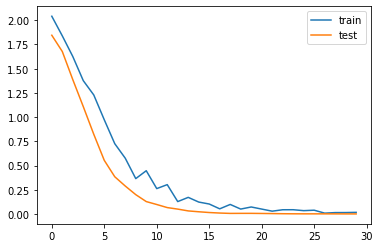

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

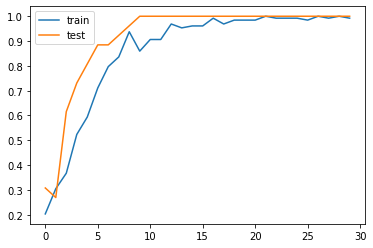

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)

print('\nTest accuracy - trial 1:', test_acc*100)

pred_ann = model.predict(X_val)

1/1 - 0s - loss: 5.2235e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step

Test accuracy - trial 1: 100.0


In [ ]:
unique, counts = np.unique(pred_ann, return_counts=True)

result_ANN = np.column_stack((unique, counts)) 
print("result ANN 1",result_ANN)

result ANN 1 [[9.80172974e-14 1.00000000e+00]
 [1.85666017e-13 1.00000000e+00]
 [1.42745581e-12 1.00000000e+00]
 [6.69881902e-12 1.00000000e+00]
 [1.12678417e-11 1.00000000e+00]
 [2.13537504e-11 1.00000000e+00]
 [2.48189715e-11 1.00000000e+00]
 [3.23465768e-11 1.00000000e+00]
 [3.49181517e-11 1.00000000e+00]
 [5.02027864e-11 1.00000000e+00]
 [5.13075069e-11 1.00000000e+00]
 [5.67546669e-11 1.00000000e+00]
 [8.14121340e-11 1.00000000e+00]
 [8.58602842e-11 1.00000000e+00]
 [1.11860049e-10 1.00000000e+00]
 [1.26288480e-10 1.00000000e+00]
 [2.12528731e-10 1.00000000e+00]
 [2.53126797e-10 1.00000000e+00]
 [3.89512061e-10 1.00000000e+00]
 [4.01084110e-10 1.00000000e+00]
 [4.36258973e-10 1.00000000e+00]
 [5.53908253e-10 1.00000000e+00]
 [5.58668833e-10 1.00000000e+00]
 [6.12212170e-10 1.00000000e+00]
 [7.57328089e-10 1.00000000e+00]
 [1.50634860e-09 1.00000000e+00]
 [1.78774417e-09 1.00000000e+00]
 [1.81421322e-09 1.00000000e+00]
 [1.84914173e-09 1.00000000e+00]
 [2.13932427e-09 1.00000000e+0

Randomly picking 5 actual tags and the predicted tags to check if the model is working correctly and predicting the correct tags.

In [ ]:
from random import randint

for i in range(5):

  sample = randint(0,(len(y_val)-1))
  print("Count No.    :",i)
  print("")
  print("y_val[sample]",y_val[sample])
  print("pred_ann[sample]",pred_ann[sample])
  print("")

  print("y_val[sample]",np.argmax(y_val[sample]))
  print("pred_ann[sample]",np.argmax(pred_ann[sample]))
  print("")

  print("Actual tag is", Classes[np.argmax(y_val[sample])])
  print("Predicted tag is", Classes[np.argmax(pred_ann[sample])])
  print("")
  print("")


Count No.    : 0

y_val[sample] [0 0 0 0 0 0 1 0]
pred_ann[sample] [1.1267842e-11 1.4274558e-12 7.5732809e-10 2.6884166e-08 5.7853362e-09
 3.8951206e-10 1.0000000e+00 3.4918152e-11]

y_val[sample] 6
pred_ann[sample] 6

Actual tag is SL
Predicted tag is SL


Count No.    : 1

y_val[sample] [0 0 0 0 0 1 0 0]
pred_ann[sample] [4.6885555e-04 4.9320683e-05 1.3064337e-04 5.8197465e-06 1.7052762e-06
 9.9924940e-01 5.9922346e-05 3.4294535e-05]

y_val[sample] 5
pred_ann[sample] 5

Actual tag is Profane
Predicted tag is Profane


Count No.    : 2

y_val[sample] [0 0 0 1 0 0 0 0]
pred_ann[sample] [1.2628848e-10 5.8391137e-08 3.2346577e-11 9.9997091e-01 2.6745947e-05
 5.5866883e-10 2.2985787e-06 1.1691466e-08]

y_val[sample] 3
pred_ann[sample] 3

Actual tag is NN
Predicted tag is NN


Count No.    : 3

y_val[sample] [0 1 0 0 0 0 0 0]
pred_ann[sample] [4.7153446e-08 9.9998569e-01 1.9880736e-06 5.6536481e-07 6.8728232e-06
 6.3573886e-08 4.1542588e-08 4.6894288e-06]

y_val[sample] 1
pred_ann[sample] 

A bunch of functions to 

- tokenise the user input
- check input against the vocabulory
- using the trained ANN model to predict the right tag
- using the predicted tag to pick and display appropriate pre-built response

In [ ]:
def ourText(text):                             #      this function tokenizes & lemmatizes the user input
  newtkns = nltk.word_tokenize(text)
  newtkns = [lm.lemmatize(word) for word in newtkns]
  return newtkns

def wordBag(text, vocab):                      #     this function loops through the input words and checks against the pre-provided pattern corpus and creates a bag of words
  newtkns = ourText(text)
  bagOwords = [0] * len(vocab)
  for w in newtkns:
    for idx, word in enumerate(vocab):
      if word == w:
        bagOwords[idx] = 1
  return np.array(bagOwords)

def pred_tag(text, vocab, labels):               #     this function uses the trained ANN model and predicts the tag
  bagOwords = wordBag(text, vocab)
  Result = model.predict(np.array([bagOwords]))[0]
  newThresh = 0.2
  yp = [[idx, res] for idx, res in enumerate(Result) if res > newThresh]

  yp.sort(key=lambda x: x[1], reverse=True)
  newList = []
  for r in yp:
    newList.append(labels[r[0]])
  return newList

def pred_resp(firstlist, fJson):                 #     this function matches the predicted tag in the available corpus tags and identifies a response for the user
  tag = firstlist[0]
  listOfIntents = fJson["intents"]
  for i in listOfIntents:
    if i["tag"] == tag:
      Result = random.choice(i["responses"])
      break
  return Result

2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus

3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it. 

In [ ]:
flag=True
print("Chitti: Hello My name is Chitti. How are you doing today ? I am assigned to answer your queries. If you want to exit,type Bye!")
while(flag==True):
    user_response = input()
    print(user_response)
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks'):
            flag=False
            print("Chitti: You are welcome..")
        else:
          return_tag = pred_tag(user_response, newWords, Classes)
          Chitti_resp = pred_resp(return_tag, json_load)
          print(Chitti_resp)            
    else:
        flag=False
        print("Chitti: Bye! take care..")

Chitti: Hello My name is Chitti. How are you doing today ? I am assigned to answer your queries. If you want to exit,type Bye!
how
how
Hello! how can i help you ?
name
name
I am your virtual learning assistant
olympus
olympus
Link: Olympus wiki
forward
forward
Link: Neural Nets wiki
bloody
bloody
Please use respectful words
thanks
thanks
Chitti: You are welcome..
